<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reference-Links" data-toc-modified-id="Reference-Links-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reference Links</a></span><ul class="toc-item"><li><span><a href="#Plot-a-sinewave" data-toc-modified-id="Plot-a-sinewave-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Plot a sinewave</a></span></li><li><span><a href="#A-Square-Pulse" data-toc-modified-id="A-Square-Pulse-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>A Square Pulse</a></span></li><li><span><a href="#An-impulse" data-toc-modified-id="An-impulse-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>An impulse</a></span></li></ul></li></ul></div>

# Signals in Python

Author: Gary Decosmo

Date Created: 3/6/2021

In [11]:
import scipy.signal as signal
import sympy as sp
from IPython.display import Image, SVG
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Reference Links

https://docs.scipy.org/doc/scipy/reference/signal.html


`chirp(t, f0, t1, f1[, method, phi, vertex_zero])  # Frequency-swept cosine generator.`

`gausspulse(t[, fc, bw, bwr, tpr, retquad, …]) # Return a Gaussian modulated sinusoid`

`max_len_seq(nbits[, state, length, taps]) # Maximum length sequence (MLS) generator.`

`sawtooth(t[, width]) # Return a periodic sawtooth or triangle waveform.`

`square(t[, duty]) # Return a periodic square-wave waveform.`

`sweep_poly(t, poly[, phi]) # Frequency-swept cosine generator, with a time-dependent frequency.`

`unit_impulse(shape[, idx, dtype]) # Unit impulse signal (discrete delta function) or unit basis vector.`

#### Plot a sinewave

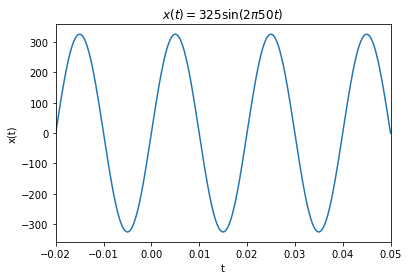

In [12]:
t = np.linspace(-0.02,0.05,1000)
plt.plot(t,325*np.sin(2*np.pi*50*t))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'$x(t)=325 \sin(2\pi 50 t)$');
plt.xlim([-0.02, 0.05]);
plt.show()

#### A Square Pulse

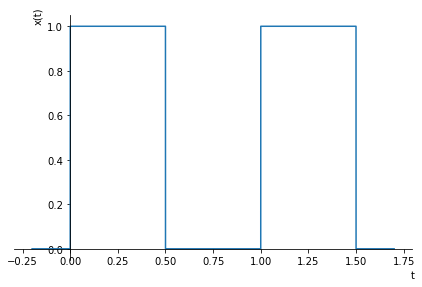

In [13]:
t, T0 = sp.symbols("t, T0")
x = sp.Piecewise((1, t % T0<=T0/2),(0, True))
sp.plot(x.subs(T0,1), (t,-.2, 1.7), xlabel="t", ylabel="x(t)", line_width=3)
plt.show()

#### An impulse

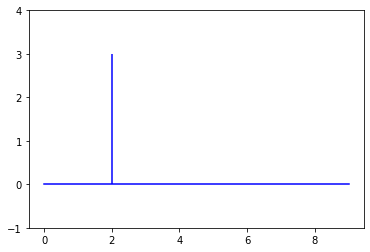

In [14]:
n = np.arange(10)
x = np.zeros_like(n)
x[2]=3
plt.vlines(n,0,x,'b')
plt.ylim(-1,4);
plt.plot(n,0*n, 'b')
plt.show()

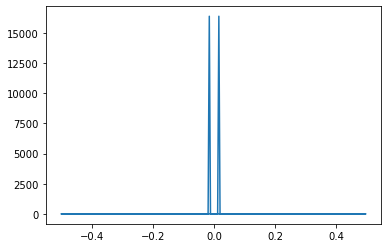

In [15]:
N = 256
t = np.arange(N)

m = 4
nu = float(m)/N
f = np.sin(2*np.pi*nu*t)
ft = np.fft.fft(f)
freq = np.fft.fftfreq(N)
plt.plot(freq, ft.real**2 + ft.imag**2)
plt.show()

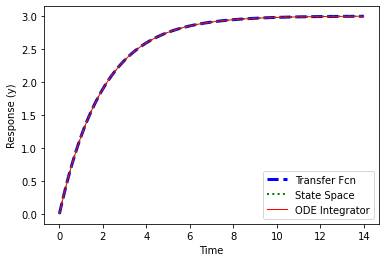

In [16]:
# Simulate taup * dy/dt = -y + K*u
Kp = 3.0
taup = 2.0

# (1) Transfer Function
num = [Kp]
den = [taup,1]
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1)

# (2) State Space
A = -1.0/taup
B = Kp/taup
C = 1.0
D = 0.0
sys2 = signal.StateSpace(A,B,C,D)
t2,y2 = signal.step(sys2)

# (3) ODE Integrator
def model3(y,t):
    u = 1
    return (-y + Kp * u)/taup
t3 = np.linspace(0,14,100)
y3 = odeint(model3,0,t3)

plt.figure(1)
plt.plot(t1,y1,'b--',linewidth=3,label='Transfer Fcn')
plt.plot(t2,y2,'g:',linewidth=2,label='State Space')
plt.plot(t3,y3,'r-',linewidth=1,label='ODE Integrator')
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.legend(loc='best')
plt.show()

In [17]:
# tau * dy2/dt2 + 2*zeta*tau*dy/dt + y = Kp*u
Kp = 2.0    # gain
tau = 1.0   # time constant
zeta = 0.25 # damping factor
theta = 0.0 # no time delay
du = 1.0    # change in u

# (1) Transfer Function
num = [Kp]
den = [tau**2,2*zeta*tau,1]
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1)

# (2) State Space
A = [[0.0,1.0],[-1.0/tau**2,-2.0*zeta/tau]]
B = [[0.0],[Kp/tau**2]]
C = [1.0,0.0]
D = 0.0
sys2 = signal.StateSpace(A,B,C,D)
t2,y2 = signal.step(sys2)

# (3) ODE Integrator
def model3(x,t):
    y = x[0]
    dydt = x[1]
    dy2dt2 = (-2.0*zeta*tau*dydt - y + Kp*du)/tau**2
    return [dydt,dy2dt2]

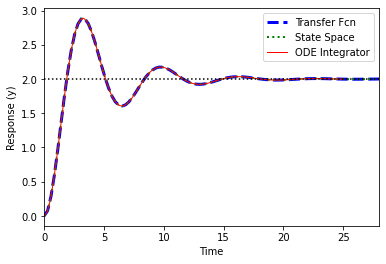

In [18]:
t3 = np.linspace(0,25,100)
x3 = odeint(model3,[0,0],t3)
y3 = x3[:,0]
plt.figure(1)
plt.plot(t1,y1*du,'b--',linewidth=3,label='Transfer Fcn')
plt.plot(t2,y2*du,'g:',linewidth=2,label='State Space')
plt.plot(t3,y3,'r-',linewidth=1,label='ODE Integrator')
y_ss = Kp * du
plt.plot([0,max(t1)],[y_ss,y_ss],'k:')
plt.xlim([0,max(t1)])
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.legend(loc='best')
plt.savefig('2nd_order.png')
plt.show()